In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.signal as signal

from pathlib import Path
import glob
import shutil
import os
import pickle

import sys
sys.path.append('/storage3/eva/code/remapping/src')
import path_formatting as pf
import utils
import oe

In [2]:
date = "20250915" # change this according to ur session
animal = "eb03"

oe_sr = 30000
m_sr = 120

_, ks_path, csv_path, res_path = utils.path_load(date, animal,p=True)

acg_path = Path(res_path) / 'acg'
os.makedirs(acg_path, exist_ok=True) # Create the folder if it doesn't exist

Ola! For folders inside of res_path: Path(res_path)/"folder_name"
To make new folder (if not exist): your_path.mkdir(parents=True, exist_ok=True)


In [3]:
goodspiketimes = oe.ks_load(ks_path)

Sup! U have...
51 phy-good clusters


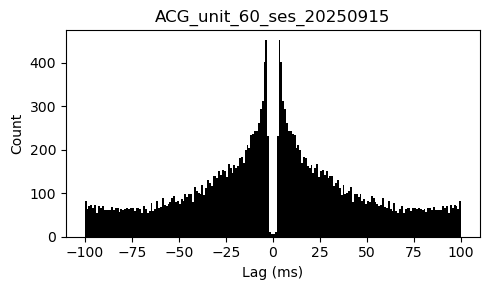

In [4]:
# example plot
unit = list(goodspiketimes.keys())[0] # pick the unit u wanna plot

lags, acorr = oe.acg(goodspiketimes[unit]) # under the hood see src/oe.py

plt.figure(figsize=(5, 3))
plt.bar(lags, acorr, width=1, color='black')

filename = f'ACG_unit_{unit}_ses_{date}'
plt.title(filename)
plt.xlabel('Lag (ms)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [5]:
acg_dict = {}

for unit_id, spikes in goodspiketimes.items():

    unit = {}

    _lags, _acg = oe.acg(spikes)

    # save results for further analysis
    unit['lags'] = _lags
    unit['acg'] = _acg
    acg_dict[unit_id] = unit

    plt.figure(figsize=(5, 3))
    plt.bar(_lags, _acg, width=1, color='black')

    filename = f'ACG_unit_{unit_id}_ses_{date}'
    plt.title(filename)
    plt.xlabel('Lag (ms)')
    plt.ylabel('Count')
    plt.tight_layout()

    plt.savefig(f"{acg_path}/{filename}.png", dpi=300, bbox_inches='tight')
    plt.close()

In [6]:
with open(f"{acg_path}/acg_{animal}_{date}.pkl", "wb") as f:
    pickle.dump(acg_dict, f)

In [ ]:
# to load later
# with open(f"{acg_path}/acg_{animal}_{date}.pkl", "rb") as f:
#     acg_dict = pickle.load(f)